<h1 align="center" style="color:white;background-color:#247881;padding:40px;margin-bottom:80px;border-radius:10px;font-family:Montserrat"> 
    Dataset Processing for Crop Recommendation System
</h1>

<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;border-radius:10px;font-family:Montserrat"> 
    Import Libraries 
</h2>

In [1]:
# work with data
import pandas as pd
import numpy as np

# import library to convert string to integer
from sklearn.preprocessing import LabelEncoder

# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

# warnings
import warnings
warnings.filterwarnings("ignore")

<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;margin-top:80px;border-radius:10px;font-family:Montserrat"> 
    Import Dataset 
</h2>

In [2]:
# import
df = pd.read_csv("../../raw_data/recommendation/raw_crop_recommendation_dataset.csv")

# print
df.head()

N   P   K  temperature   humidity        ph    rainfall  crop
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;margin-top:80px;margin-bottom:80px;border-radius:10px;font-family:Montserrat"> 
    Data Exploration
</h2>

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Utility class
</h4>

In [3]:
class c:
    HEADER      = '\033[95m'
    BLUE        = '\033[94m'
    CYAN        = '\033[96m'
    GREEN       = '\033[92m'
    WARNING     = '\033[93m'
    FAIL        = '\033[91m'
    ENDC        = '\033[0m'
    BOLD        = '\033[1m'
    UNDERLINE   = '\033[4m'

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Top 5 elements of data
</h4>

In [4]:
df.head()

N   P   K  temperature   humidity        ph    rainfall  crop
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Bottom 5 elements of data
</h4>

In [5]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall    crop
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Total size of data (row * column)
</h4>

In [6]:
print(f"\nSize of dataframe is:{c.BOLD} {str(df.size)} {c.ENDC}\n")


Size of dataframe is: 17600 



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    shape of data (row, column)
</h4>

In [7]:
print(f"\nShape of dataframe is:{c.BOLD} {str(df.shape)} {c.ENDC}\n")


Shape of dataframe is: (2200, 8) 



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Show all columns
</h4>

In [8]:
print(f"\nList of columns in dataframe::{c.BOLD} {str(df.columns.tolist())} {c.ENDC}\n")


List of columns in dataframe:: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'] 



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Datatype of all columns and dataframe
</h4>

In [9]:
print(f"\nDatatypes present in dataframe:\n\n{c.BOLD}{str(df.dtypes)}{c.BOLD}\n")


Datatypes present in dataframe:

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
crop            object
dtype: object



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Check for all unique values in crop column
</h4>

In [10]:
print(f"\nAll unique values in columns:\n\n{c.BOLD}{str(df['crop'].unique().tolist())}{c.ENDC}\n")



All unique values in columns:

['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Check for any null value in dataframe
</h4>

In [11]:
print(f"\nList of null values in dataframe:\n\n{c.BOLD}{str(df.isnull().sum())}{c.BOLD}")


List of null values in dataframe:

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64


<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Count of crop elements in crop column
</h4>

In [12]:
print(f"\nCount of crop column elements:\n\n{c.BOLD}{df['crop'].value_counts()}{c.BOLD}")


Count of crop column elements:

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64


<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Overall information of entire dataset
</h4>

In [13]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;margin-top:80px;margin-bottom:80px;border-radius:10px;font-family:Montserrat"> 
    Data Visualization
</h2>

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Mean value of temperature vs crops
</h4>

<AxesSubplot:xlabel='crop', ylabel='temperature'>

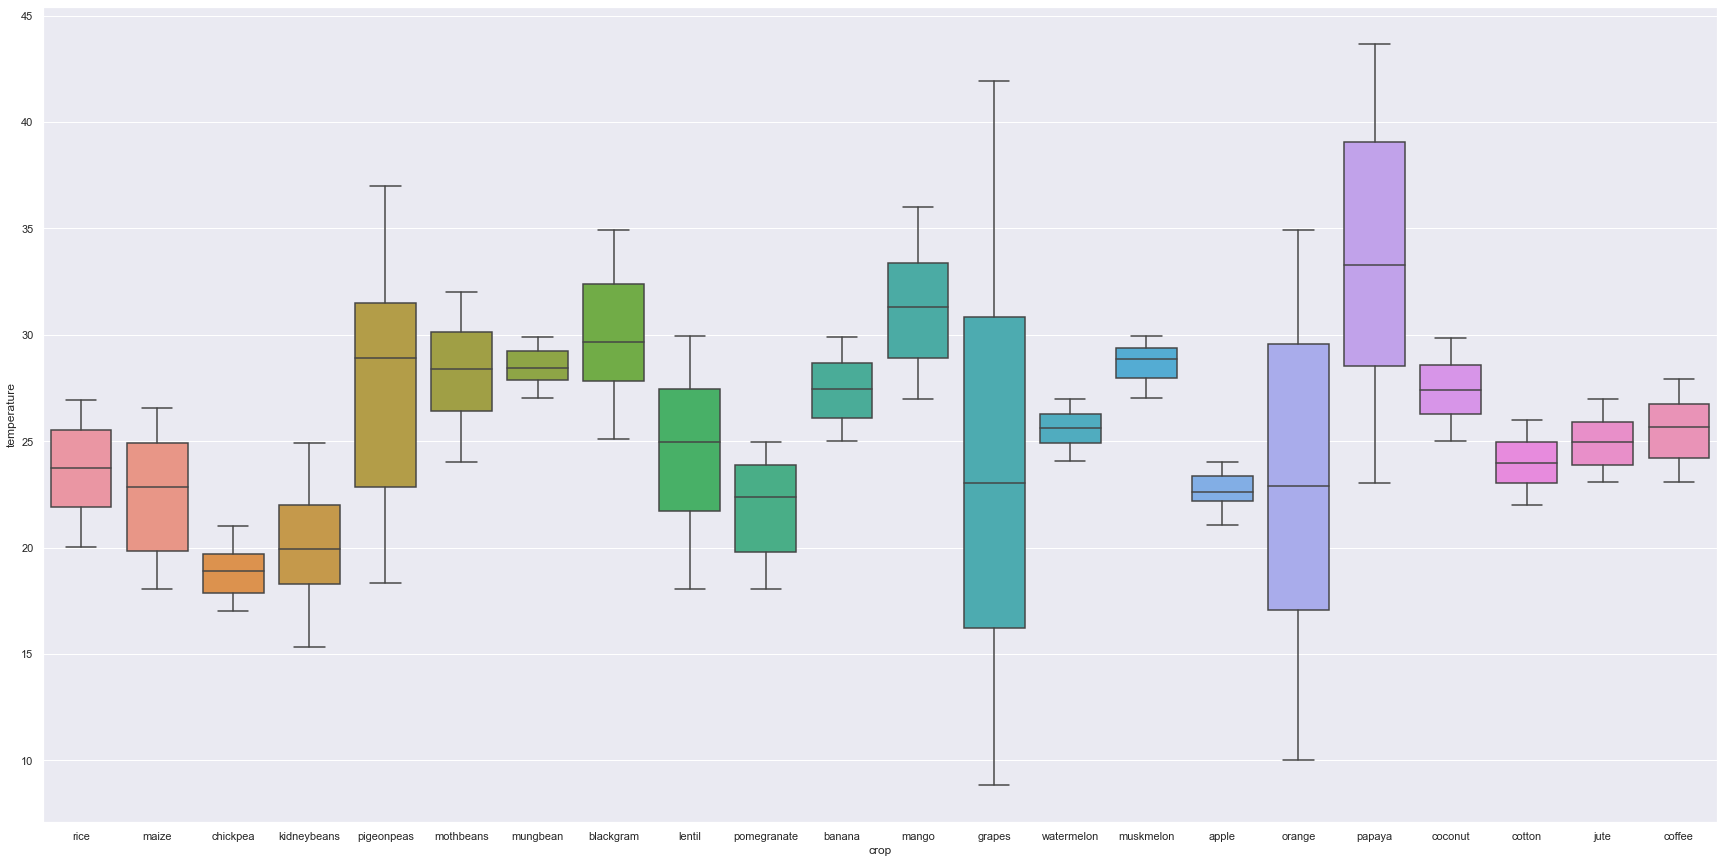

In [14]:
sns.set_theme(style = "darkgrid")
plt.subplots(figsize = (30,15))
sns.boxplot(x = 'crop', y = 'temperature', data = df)

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Mean value of all parameters vs crops
</h4>

In [15]:
# setup mean spreadsheet
mean_spreadsheet = pd.pivot_table(df , index = ['crop'], aggfunc = 'mean')
fig = go.Figure()

# add traces

fig.add_trace(go.Bar(
    x = mean_spreadsheet.index,
    y = mean_spreadsheet['N'],
    name = 'Nitrogen',
    marker_color = 'tomato'
))

fig.add_trace(go.Bar(
    x = mean_spreadsheet.index,
    y = mean_spreadsheet['P'],
    name = 'Phosphorous',
    marker_color = 'mediumseagreen'
))

fig.add_trace(go.Bar(
    x = mean_spreadsheet.index,
    y = mean_spreadsheet['K'],
    name = 'Potassium',
    marker_color = 'dodgerblue'
))

fig.add_trace(go.Bar(
    x = mean_spreadsheet.index,
    y = mean_spreadsheet['temperature'],
    name = 'Temperature',
    marker_color = 'gold'
))

fig.add_trace(go.Bar(
    x = mean_spreadsheet.index,
    y = mean_spreadsheet['humidity'],
    name = 'Humidity',
    marker_color = 'hotpink'
))

fig.add_trace(go.Bar(
    x = mean_spreadsheet.index,
    y = mean_spreadsheet['ph'],
    name = 'Ph value',
    marker_color = 'mistyrose'
))

fig.add_trace(go.Bar(
    x = mean_spreadsheet.index,
    y = mean_spreadsheet['rainfall'],
    name = 'Rainfall',
    marker_color = 'slategray'
))

# set layout
fig.update_layout(title = "Mean value of all parameters vs crops",
                  plot_bgcolor = 'lavender',
                  barmode = 'group',
                  xaxis_tickangle = +45,
                  autosize = False,
                  width = 1100,
                  height = 500,
                  margin = dict(l=0,r=0,b=100,t=100,pad=4),
                  bargap = 0.30,
                  bargroupgap = 0.0)

# mark outline
for i in range(len(fig.data)):
    fig.data[i].marker.line.width = 0.3
    fig.data[i].marker.line.color = "black"

# print
fig.show()

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Distribution of all parameters
</h4>

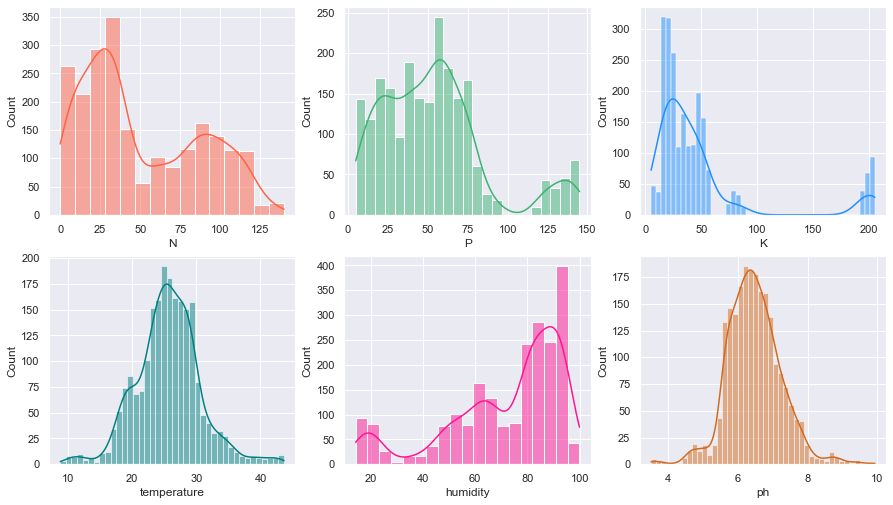

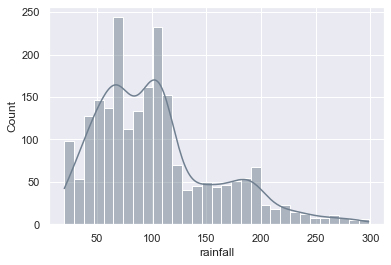

In [16]:
# local variables
cnt = 1
all_columns = df.columns[:-1]
plt.figure(figsize = (15,13))
colors = ['tomato', 'mediumseagreen', 'dodgerblue', 'teal', 'deeppink', 'chocolate', 'slategray']

# show all graphs except last
for column in all_columns[:-1]:
    plt.subplot(3, 3, cnt)
    sns.histplot(df[column], kde = True, color = colors[cnt - 1])
    cnt += 1
plt.show()

# show last graph
sns.histplot(df[all_columns[-1]], kde = True, color = colors[cnt - 1])
plt.show()

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Pairplot analysis
</h4>

<Figure size 1368x1224 with 0 Axes>

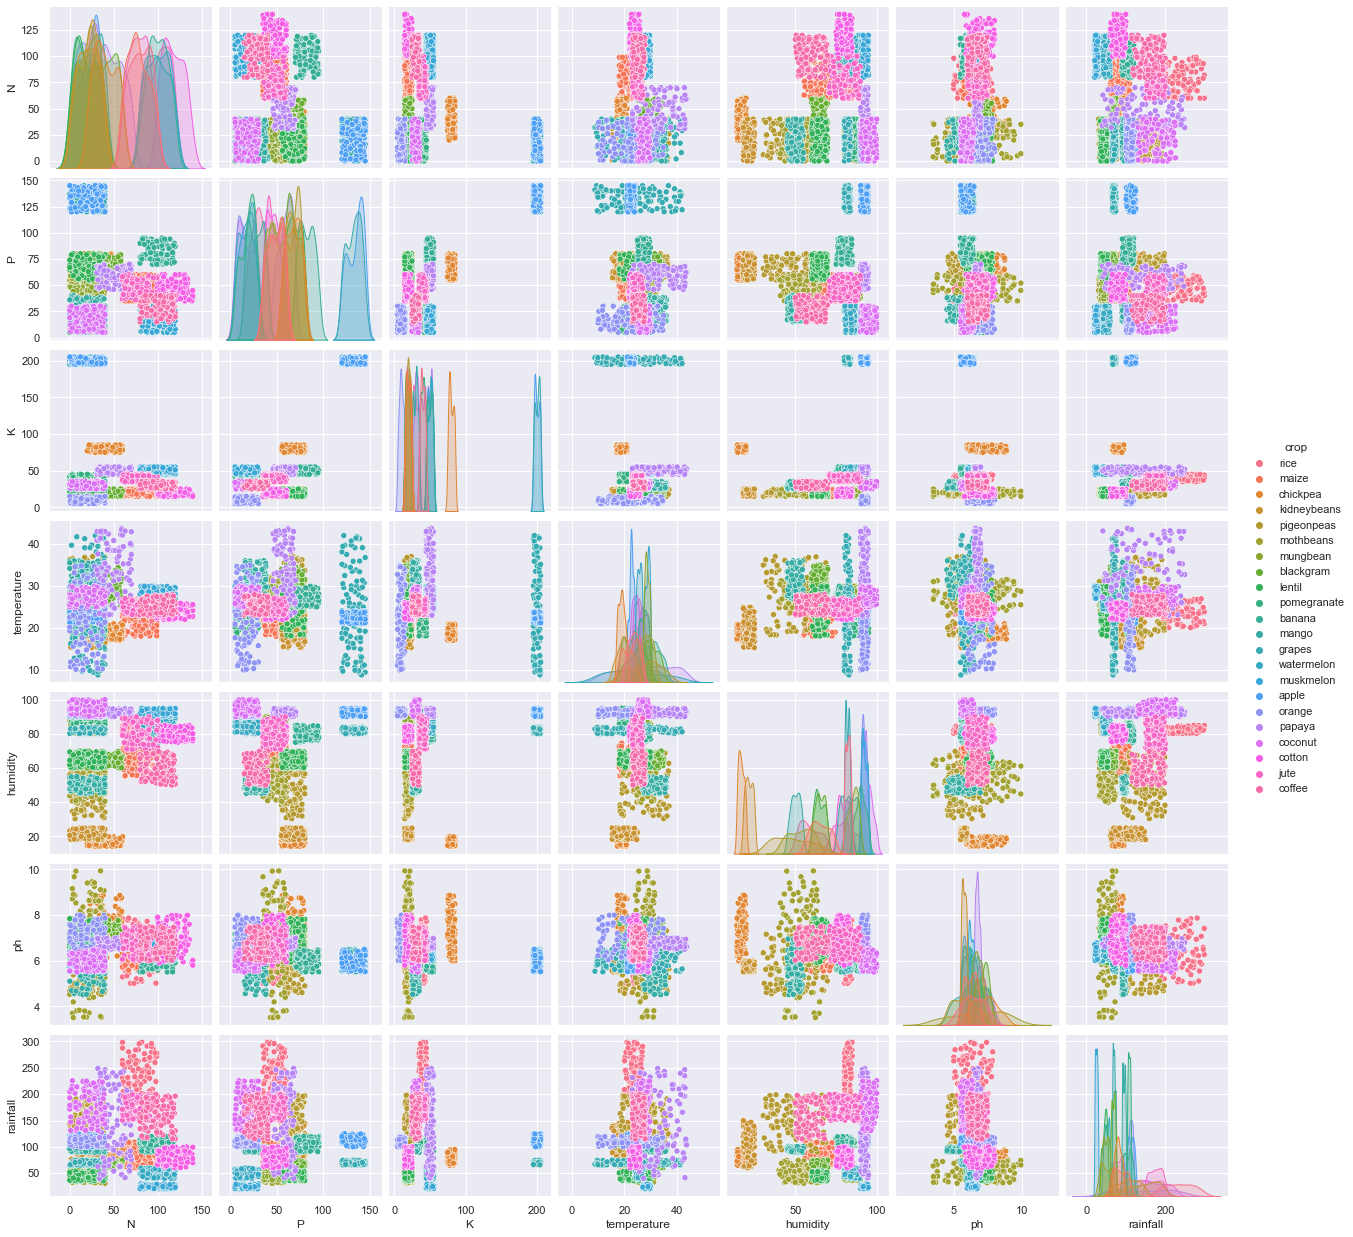

In [17]:
plt.figure(figsize = (19,17))
sns.pairplot(df, hue = "crop")

plt.show()

<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;margin-top:80px;margin-bottom:80px;border-radius:10px;font-family:Montserrat"> 
    Data Processing
</h2>

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Separate input and output column
</h4>

In [18]:
df

N   P   K  temperature   humidity        ph    rainfall    crop
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [19]:
# store input parameters in 'inputs' variable
inputs = df.drop('crop', axis = 'columns')

# store corp parameter in 'crop' variable
outputs = df[['crop']]

In [20]:
inputs

N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

In [21]:
outputs

crop
0       rice
1       rice
2       rice
3       rice
4       rice
...      ...
2195  coffee
2196  coffee
2197  coffee
2198  coffee
2199  coffee

[2200 rows x 1 columns]

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Convert all strings to integer
</h4>

In [22]:
# Encoding label (i.e string format) to integer for training and testing model
label_encoder = LabelEncoder()

In [23]:
# create separate column for converted values
outputs['crop_converted'] = label_encoder.fit_transform(outputs['crop'])
outputs

crop  crop_converted
0       rice              20
1       rice              20
2       rice              20
3       rice              20
4       rice              20
...      ...             ...
2195  coffee               5
2196  coffee               5
2197  coffee               5
2198  coffee               5
2199  coffee               5

[2200 rows x 2 columns]

In [24]:
# drop string column
outputs_converted = outputs.drop(['crop'], axis = 'columns')
outputs_converted

crop_converted
0                 20
1                 20
2                 20
3                 20
4                 20
...              ...
2195               5
2196               5
2197               5
2198               5
2199               5

[2200 rows x 1 columns]

In [25]:
{index : label for index, label in enumerate(label_encoder.classes_)}

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Store processed dataset
</h4>

In [28]:
inputs.to_csv("../../processed_data/recommendation/processed_crop_recommendation_inputs.csv")
outputs_converted.to_csv("../../processed_data/recommendation/processed_crop_recommendation_outputs.csv")